In [1]:
"""Classify the email using the binary classification method. Email Spam
detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest
Neighbors classification. Analyze their performance."""

'Classify the email using the binary classification method. Email Spam\ndetection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest\nNeighbors and Support Vector Machine for classification. Analyze their performance.'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [4]:
dataset = pd.read_csv("Dataset\emails.csv")
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
dataset = dataset.drop('Email No.', axis = 1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [7]:
dataset.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [8]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
k_value = range(1, 20)
error = []
for i in k_value:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))


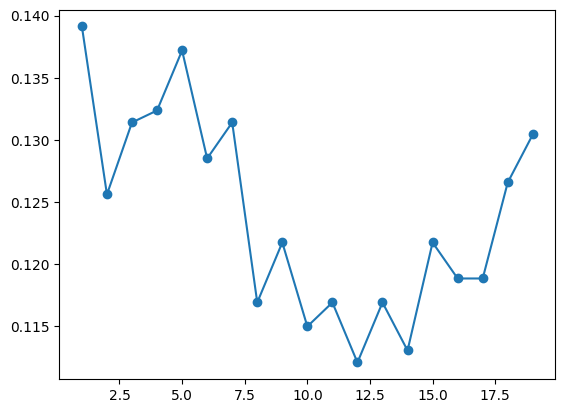

In [14]:
plt.plot(k_value, error, marker = 'o')

In [15]:
knn = KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [16]:
y_pred = knn.predict(X_test)
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[659  80]
 [ 41 255]]


In [19]:
print("Accuracy is ", accuracy_score(y_test, y_pred))
print("Precision is ", precision_score(y_test, y_pred))
print("Recall is ", recall_score(y_test, y_pred))

Accuracy is  0.8830917874396135
Precision is  0.7611940298507462
Recall is  0.8614864864864865
